# Image Classification using Convolutional Neural Networks

## Problem
Given a set of box images, classify whether the box is 'good' or 'bad'.

## Objective
  1. Classify the box images as 'good' or 'bad'       using Convolutional Neural Networks (CNN).
  2. Differentiate each of the CNN architectures and models used
  3. Select the best model for the problem based on a set of criteria
  
## Data
There are 379 images of boxes in the data which are sorted by their classification. Out of the 379 images, 186 are tagged as "NG" (Not Good) while 187 are tagged as "OK" (good condition). 

Visual inspection of the boxes was performed. We saw that NG box images are boxes in 'bad conditions' e.g. box has been torn, or  the box has holes or tears.On the other hand,'OK' box images are boxes in 'good condition' e.g. neat, no wear and tear, and no holes. 

We will be splitting the data into test and train datasets in 60-40 ratio: 60% of data goes to training test while 40% goes to test set.
 
## Methodology
 
### Convolutional Neural Networks
 Convolutional Neural Networks (also called CNN or ConvNets) is an artificial neural network technique that preserves spatial structure which allows it to scale full images well. This characteristic of CNNs enables it to achieve excellent results to computer vision problems compared to regular neural networks.
 
  The Keras module in Python contains several CNN architectures with pre-trained weights from ImageNet which can be used for prediction, fine-tuning, and feature extraction. 
 
 ### Transfer Learning & ImageNet
  
  Transfer learning is a machine learning technique where a previously generated model trained on a specific task is reused on a second related task. 
 
 
 ImageNet is a large set of annotated photographs which are intended for research and development of methods for computer vision. 
 
 We will be using Transfer learning through image classification architectures trained using ImageNet, i.e. **VGG16**, **MobileNet**,and **InceptionV3**. We will be selecting one champion model based on accuracy, runtime, error/loss, and usability.

## Model Selection

Champion model will be selected based on the following criteria:

*  **Accuracy** - correctness of predictions 
*  **Run Time** - length of time the model was trained. Run time is a metric to be considered especially on problems on a limited timeframe. 
*   **Error/Loss** - indicates how well the model behaves after iteration of optimization
*   **Usability**- how will the model be deployed, and how the other criteria/metric affect its deployment







### VGG16

VGG16 is a network known for its simplicity. The network utilizes a 3x3 convolutional layer stacked  in increasing depth. Max pooling handles the reduction of the volume size. The '16' in 'VGG16' refers to the number of weight layers in the network. 

One of the drawbacks of this network is that the network architecture has large weights, making it computationally intensive.



In [6]:
import keras
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16 
import numpy as np
import time
from keras import models
from keras import layers
from keras import optimizers
from google.colab import drive

drive.mount('/content/drive')



def main():
    np.random.seed(45)
    nb_class = 2
    width, height = 300,300

    sn = VGG16(weights='imagenet',include_top=False,input_shape=(width,height,3))
    
    model=models.Sequential()
    model.add(sn)
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(2,activation='softmax'))
    
    print('Build model')

    sgd = SGD(lr=0.01, decay=0.0002, momentum=0.9, nesterov=True)
    model.compile(
        optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    print(sn.summary())

    # Training
    train_data_dir = '/content/drive/My Drive/Assessment//boxes/train'
    validation_data_dir = '/content/drive/My Drive/Assessment/boxes/test'
    nb_train_samples = 120
    nb_validation_samples =70
    nb_epoch = 10

    #   Generator
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')
                                     
    start=time.time()
    model.fit_generator(
            train_generator,
            samples_per_epoch=nb_train_samples,
            nb_epoch=nb_epoch,
            validation_data=validation_generator,
            nb_val_samples=nb_validation_samples, 
            verbose=2,
            shuffle=True)
    end=time.time()
    print(end-start)
    sn.save_weights('/content/drive/My Drive/Assessment/boxes/weights_VGG16.h5')
main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
58892288/58889256 [==============================] - 2s 0us/step
Build model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
bl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=2, shuffle=True, steps_per_epoch=30, epochs=10, validation_steps=70)`


Epoch 1/10
 - 770s - loss: 7.6831 - acc: 0.4917 - val_loss: 7.8864 - val_acc: 0.5107
Epoch 2/10
 - 741s - loss: 8.3346 - acc: 0.4829 - val_loss: 7.8864 - val_acc: 0.5107
Epoch 3/10
 - 751s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.3469 - val_acc: 0.4821
Epoch 4/10
 - 741s - loss: 7.6624 - acc: 0.5246 - val_loss: 7.7712 - val_acc: 0.5179
Epoch 5/10
 - 751s - loss: 7.6561 - acc: 0.5250 - val_loss: 7.7712 - val_acc: 0.5179
Epoch 6/10
 - 739s - loss: 8.8590 - acc: 0.4504 - val_loss: 8.0015 - val_acc: 0.5036
Epoch 7/10
 - 750s - loss: 8.7306 - acc: 0.4583 - val_loss: 7.8864 - val_acc: 0.5107
Epoch 8/10
 - 740s - loss: 8.3212 - acc: 0.4837 - val_loss: 7.9439 - val_acc: 0.5071
Epoch 9/10
 - 751s - loss: 7.9247 - acc: 0.5083 - val_loss: 8.0015 - val_acc: 0.5036
Epoch 10/10
 - 739s - loss: 8.1868 - acc: 0.4921 - val_loss: 7.9439 - val_acc: 0.5071
7474.430474996567


### InceptionV3

InceptionV3 is the 3rd variant of the network originally called *GoogLeNet*. The network that is 42 layers deep, which allows it to obtain a lower error rate. The network computes 1x1, 3x3, and 5x5 convolutions with the same module of the network.

InceptionV3 has smaller weights and is more efficient than VGGNet.

In [4]:
#Inception
import keras

from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from google.colab import drive

drive.mount('/content/drive')



def main():
    np.random.seed(45)
    nb_class = 2
    width, height = 300,300
    sn = keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=None,
                                                     input_tensor=None, 
                                                     input_shape=(300,300,3),
                                                     pooling=None,classes=2)

    
    print('Build model')

    sgd = SGD(lr=0.01, decay=0.0002, momentum=0.9, nesterov=True)
    sn.compile(
        optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    print(sn.summary())

    # Training
    train_data_dir = '/content/drive/My Drive/Assessment/boxes/train'
    validation_data_dir = '/content/drive/My Drive/Assessment/boxes/test'
    nb_train_samples = 120
    nb_validation_samples =70
    nb_epoch = 10

    #   Generator
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')
                                         
    start=time.time()
    sn.fit_generator(
            train_generator,
            samples_per_epoch=nb_train_samples,
            nb_epoch=nb_epoch,
            validation_data=validation_generator,
            nb_val_samples=nb_validation_samples, 
            verbose=2,
            shuffle=True)
    end=time.time()
    sn.save_weights('/content/drive/My Drive/Assessment/boxes/weights_inceptionv3.h5')
    print(end-start)
main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Build model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           ba

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=2, shuffle=True, steps_per_epoch=30, epochs=10, validation_steps=70)`


Epoch 1/10
 - 348s - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.4964
Epoch 2/10
 - 314s - loss: nan - acc: 0.5246 - val_loss: nan - val_acc: 0.4786
Epoch 3/10
 - 318s - loss: nan - acc: 0.5167 - val_loss: nan - val_acc: 0.5036
Epoch 4/10
 - 313s - loss: nan - acc: 0.5079 - val_loss: nan - val_acc: 0.4821
Epoch 5/10
 - 316s - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.5071
Epoch 6/10
 - 313s - loss: nan - acc: 0.5663 - val_loss: nan - val_acc: 0.4857
Epoch 7/10
 - 316s - loss: nan - acc: 0.4750 - val_loss: nan - val_acc: 0.4964
Epoch 8/10
 - 313s - loss: nan - acc: 0.5246 - val_loss: nan - val_acc: 0.4964
Epoch 9/10
 - 316s - loss: nan - acc: 0.5333 - val_loss: nan - val_acc: 0.4964
Epoch 10/10
 - 311s - loss: nan - acc: 0.4495 - val_loss: nan - val_acc: 0.5000
3183.31152844429


### MobileNET

Compared to VGGNet, MobileNet is a small convolutional network. Its lightweight architecture is caused by depthwise convolution, which applies a single filter to each input channel. Pointwise convolution is also performed where a 1x1 convolution is applied to combine outputs of the depthwise convolution. It is a low maintenance network, making it perform faster.



In [5]:
#mobile NET
import keras
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
import numpy as np
import time
from google.colab import drive

drive.mount('/content/drive')



def main():
    np.random.seed(45)
    nb_class = 2
    width, height = 224,224

    sn=keras.applications.mobilenet.MobileNet(classes=2,weights=None)
    print('Build model')

    sgd = SGD(lr=0.01, decay=0.0002, momentum=0.9, nesterov=True)
    sn.compile(
        optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    print(sn.summary())

    # Training
    train_data_dir = '/content/drive/My Drive/Assessment/boxes/train'
    validation_data_dir = '/content/drive/My Drive/Assessment/boxes/test'
    nb_train_samples=120
    nb_validation_samples=70
    nb_epoch=10

    #   Generator
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')                                       
    start=time.time()
    sn.fit_generator(
            train_generator,
            samples_per_epoch=nb_train_samples,
            nb_epoch=nb_epoch,
            validation_data=validation_generator,
            nb_val_samples=nb_validation_samples, 
            verbose=2,
            shuffle=True)
    end=time.time()
    sn.save_weights('/content/drive/My Drive/Assessment/boxes/weights_mobilenet_10epochs.h5')
    print(end-start)

main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Build model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=2, shuffle=True, steps_per_epoch=30, epochs=10, validation_steps=70)`


Epoch 1/10
 - 157s - loss: 1.1088 - acc: 0.5750 - val_loss: 4.4187 - val_acc: 0.4929
Epoch 2/10
 - 142s - loss: 0.7466 - acc: 0.6831 - val_loss: 8.3469 - val_acc: 0.4821
Epoch 3/10
 - 143s - loss: 1.0292 - acc: 0.6583 - val_loss: 7.7712 - val_acc: 0.5179
Epoch 4/10
 - 141s - loss: 1.1383 - acc: 0.7081 - val_loss: 8.2893 - val_acc: 0.4857
Epoch 5/10
 - 143s - loss: 0.9386 - acc: 0.7333 - val_loss: 8.3469 - val_acc: 0.4821
Epoch 6/10
 - 141s - loss: 0.8738 - acc: 0.6914 - val_loss: 6.2838 - val_acc: 0.4964
Epoch 7/10
 - 143s - loss: 0.7273 - acc: 0.7167 - val_loss: 2.4915 - val_acc: 0.5107
Epoch 8/10
 - 141s - loss: 0.7000 - acc: 0.7006 - val_loss: 3.1710 - val_acc: 0.5000
Epoch 9/10
 - 143s - loss: 0.7656 - acc: 0.7083 - val_loss: 0.7007 - val_acc: 0.6321
Epoch 10/10
 - 141s - loss: 0.6188 - acc: 0.8090 - val_loss: 0.9489 - val_acc: 0.6286
1438.1385519504547


## Model Selection Summary

We will be looking at each of the criteria to determine our champion model. For easier comparison, all three models were ran using the following hyperparameters:
*  Learning rate (**0.01** )
*  Decay (**0.0002**)
*  Nesterov Momentum (**0.9**)
*  Batch size (**4**)
*  Epochs (**10**)




## Accuracy

After running 10 epochs, the validation accuracy of the three models are as follows:
*   VGG16 (**51%**)
*   InceptionV3 (**50%**)
*   MobileNet (**63%**)

The other two models exhibit stability across 10 epochs. MobileNet was stable for the first few epochs and had a drastic increase in accuracy at the 9th epoch.

MobileNet provided the best validation  accuracy at 63%. The model is not as stable as the other two but it can be seen that MobileNet learned better. Another reason is that we are still better off with an unstable MobileNet model than models whose accuracy is not as different as that of a random guess.


**Winner: MobileNet**







In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

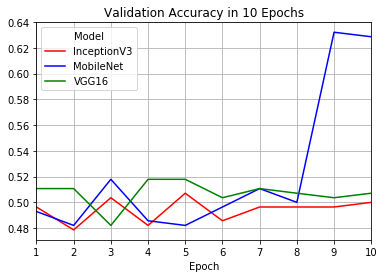

In [20]:
su=pd.read_csv('/content/drive/My Drive/Assessment/modelsummary.csv')
su.columns=['Epoch','time','loss','accuracy','val_loss','val_acc','Model']

df = su.pivot(index='Epoch', columns='Model', values='val_acc')

df.plot(title="Validation Accuracy in 10 Epochs",grid=True,color=['red', 'blue', 'green'])

## Error/Loss

In this criterion, we will be looking only at VGG16 and MobileNet since InceptionV3 yielded *nan* as its validation loss function across 10 epochs.

* VGG16 (**7.9489**)
* MobileNet (**0.9489**)

As seen from the graph below, it is clear that MobileNet has the lower validation loss in almost all 10 epochs. It experienced its greatest decline in loss from the 5th to 7th epoch.

**Winner: MobileNet**

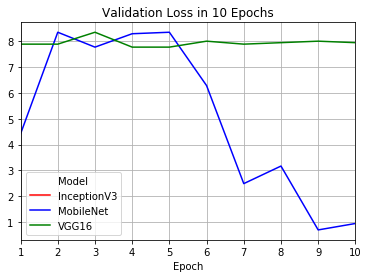

In [21]:
df = su.pivot(index='Epoch', columns='Model', values='val_loss')

df.plot(title="Validation Loss in 10 Epochs",grid=True,color=['red', 'blue', 'green'])

## Run Time

After 10 epochs, the run time of each model are as follows:
* VGG16 (**125 minutes**)
* InceptionV3 (**53 minutes**)
* MobileNet (**24 minutes**)

The average run time of an epoch in VGG16 is 12 minutes while an epoch in InceptionV3 takes an average of 5 minutes. MobileNet is a lightweight network. The average run time of an epoch in this network is 2 minutes. 

The massive difference in run time makes MobileNet the clear winner.

**Winner: MobileNet**

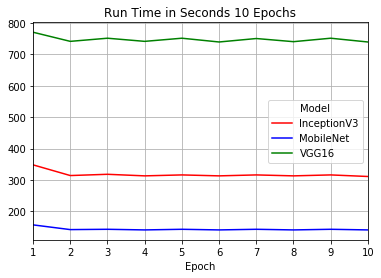

In [22]:
df = su.pivot(index='Epoch', columns='Model', values='time')

df.plot(title="Run Time in Seconds 10 Epochs",grid=True,color=['red', 'blue', 'green'])

## Usability

In terms of deployment, MobileNet has the clear advantage against the other two models.

In only 24 minutes, we are able to train a model with 63% accuracy over 10 epochs with a validation loss of 0.9482. MobileNet in this case is a fast, accurate, and well-behaved model.

Deployment of MobileNet will be more feasible and effective. Due to its compactness, it can be deployed through mobile phones or smaller gadgets.

Looking beyond our current objective of classifying the boxes as either'good' or 'bad', we can expand MobileNet's usage to different variations of the problem at hand. Its lightweight architecture enables it to be trained on top of another algorithm with less computational cost and better accuracy. An example would be creating a mobile application that assesses the condition of delivery goods based on images.

**Winner: MobileNet**


## Champion Model: MobileNet

MobileNet is at a clear advantage against its competitors in this scenario. VGG16 and InceptionV3 may have better stability and accuracy once fine-tuned, but it would take much more time to iterate. 

To see further how well MobileNet will perform, we ran our champion model over 100 epochs given the same set of parameters. It resulted to a model with **79.29%** validation accuracy, and a loss of **0.5793** under **4 hours** of training. We will be using this model to predict 'good' and 'bad' boxes in the future.

## Recommendations

Listed below are some possible improvements for this problem:
*   Iterate on other models e.g. MobileNetV2, ShuffleNet, ResNet,DenseNet
*  Allot more time to fine tune the model
*   If possible, gather more data
*   Add augmentated images into data 
*   Perform regularization in the network so that the model would learn better


## References
*   https://neurohive.io/en/popular-networks/vgg16/
*   https://keras.io/applications/
*   https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-   xception-keras/
*   https://medium.com/@sh.tsang/review-inception-v3-1st-runner-up-image-classification-in-ilsvrc-2015-17915421f77c
*  https://machinethink.net/blog/mobilenet-v2/
*  https://machinethink.net/blog/googles-mobile-net-architecture-on-iphone/
* https://medium.com/@yu4u/why-mobilenet-and-its-variants-e-g-shufflenet-are-fast-1c7048b9618d
*   https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299



# Training and Prediction Codes

## Training Code

In [2]:
#mobile NET
import keras
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
import numpy as np
import time
from google.colab import drive

drive.mount('/content/drive')



def main():
    np.random.seed(45)
    nb_class = 2
    width, height = 224,224

    sn=keras.applications.mobilenet.MobileNet(classes=2,weights=None)
    print('Build model')

    sgd = SGD(lr=0.01, decay=0.0002, momentum=0.9, nesterov=True)
    sn.compile(
        optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    print(sn.summary())

    # Training
    train_data_dir = '/content/drive/My Drive/Assessment/boxes/train'
    validation_data_dir = '/content/drive/My Drive/Assessment/boxes/test'
    nb_train_samples=120
    nb_validation_samples=70
    nb_epoch=100

    #   Generator
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)


    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(width, height),
            batch_size=4,
            class_mode='categorical')
                                        
    start=time.time()
    sn.fit_generator(
            train_generator,
            samples_per_epoch=nb_train_samples,
            nb_epoch=nb_epoch,
            validation_data=validation_generator,
            nb_val_samples=nb_validation_samples, 
            verbose=2,
            shuffle=True)
    end=time.time()
    sn.save_weights('/content/drive/My Drive/Assessment/boxes/weights_mobilenet.h5')
   
    print(end-start)
main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Build model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=2, shuffle=True, steps_per_epoch=30, epochs=100, validation_steps=70)`


Epoch 1/100
 - 210s - loss: 0.9368 - acc: 0.6750 - val_loss: 8.1742 - val_acc: 0.4929
Epoch 2/100
 - 147s - loss: 0.9658 - acc: 0.6163 - val_loss: 8.2317 - val_acc: 0.4893
Epoch 3/100
 - 144s - loss: 1.0807 - acc: 0.6000 - val_loss: 8.0015 - val_acc: 0.5036
Epoch 4/100
 - 141s - loss: 0.8378 - acc: 0.7006 - val_loss: 4.9150 - val_acc: 0.4964
Epoch 5/100
 - 143s - loss: 0.6370 - acc: 0.7583 - val_loss: 6.6668 - val_acc: 0.4893
Epoch 6/100
 - 142s - loss: 0.6849 - acc: 0.7248 - val_loss: 1.0231 - val_acc: 0.5786
Epoch 7/100
 - 143s - loss: 0.7311 - acc: 0.7333 - val_loss: 0.7293 - val_acc: 0.5607
Epoch 8/100
 - 141s - loss: 0.8418 - acc: 0.5997 - val_loss: 5.6836 - val_acc: 0.5071
Epoch 9/100
 - 143s - loss: 0.7768 - acc: 0.7500 - val_loss: 1.1119 - val_acc: 0.6107
Epoch 10/100
 - 141s - loss: 0.6352 - acc: 0.7581 - val_loss: 1.6867 - val_acc: 0.4750
Epoch 11/100
 - 144s - loss: 0.7636 - acc: 0.7417 - val_loss: 1.0287 - val_acc: 0.5714
Epoch 12/100
 - 141s - loss: 0.7252 - acc: 0.7173 - 

## Model Prediction

In [27]:
#Predict
import keras
from keras.optimizers import SGD
import cv2
import numpy as np

sgd = SGD(lr=0.01, decay=0.0002, momentum=0.9, nesterov=True)
model =keras.applications.mobilenet.MobileNet(classes=2,weights=None)

model.load_weights('/content/drive/My Drive/Assessment/boxes/weights_mobilenet.h5')
model.compile(
        optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'],)


##bad image
#img=cv2.imread("/content/drive/My Drive/Assessment/test/NG/IMG_6785.JPG")
##good image
img=cv2.imread("/content/drive/My Drive/Assessment/test/OK/IMG_6764.JPG")
img=img/255.
print(img.shape)
img=cv2.resize(img,(224,224),3)
img=np.expand_dims(img,axis=0)
print(img.shape)

result=model.predict(img)

#0= Not Good 1=Good
np.argmax(result)

(3024, 4032, 3)
(1, 224, 224, 3)


1